# TP n° 3

# Résolution numérique d'un problème de Cauchy avec le schéma d'Euler explicite


Nous allons utiliser le schéma d'Euler explicite pour construire une solution approchée d'un problème de Cauchy 
$$
\left\lbrace
\begin{aligned}
&y'(t) = f(t, y(t)), &&t>0,\\
&y(0) = y_0.
\end{aligned}
\right.
$$

Nous commençons par introduire un pas de temps $\Delta t>0$ et par définir les temps discrets $t^n=n\Delta t$. La méthode d'Euler explicite est basée sur la formule de récurrence suivante pour calculer $y^n\simeq y(t^n)$
$$
\left\lbrace
\begin{aligned}
&y^{n+1} = y^n + \Delta t f(t^n, y^n), && n\geq 0,\\
&y^0 = y_0.
\end{aligned}
\right.
$$

#### QUESTION 1

Programmer la méthode d'Euler explicite afin de calculer la solution approchée d'un problème de Cauchy scalaire générique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def euler(f, t0,tf,y0, n):
    h = (tf-t0)/n
    y = y0
    t = t0
    Y = [y0]
    T = [t0]
    for k in range(n):
        y += h*f(y,t)
        t += h
        Y.append(y)
        T.append(t)
    return T,Y


#### QUESTION 2
 
Appliquer ce schéma à la résolution numérique du problème de Verhulst.
On pourra prendre $\Delta t=1$, $y_0=0.1$ et résoudre le problème entre $t=0$ et $t=T_f=20$.

In [7]:
r = 2
K = 2
y0 = 0.1
dt = 1
t0 = 0
tf = 50 #20
n = int(tf/dt)

def VerhulstEDO(y,t):
    return r*y*(1-y/K)

def VerhulstSol(y0,t):
    return K/(1+(K/y0 - 1)*np.exp(-r*t))

t = np.linspace(t0,tf,n)
T,P = euler(VerhulstEDO,t0,tf,y0,n)

#### QUESTION 3

Tracer la solution approchée ainsi que la solution exacte dans une fenêtre graphique. 

Pour le tracé, choisissez des symboles (un carré et un cercle par exemple) afin de représenter la solution seulement aux points où elle est calculée : l'interpolation linéaire qui est faite ensuite entre les points n'a rien à voir avec la méthode numérique utilisée.

Diviser progressivement le pas de temps par deux afin de vérifier que la solution approchée converge bien vers la solution exacte. Superposer les solutions approchées obtenues avec les différents pas de temps et la solution exacte sur un même graphique.

Text(0, 0.5, 'P')

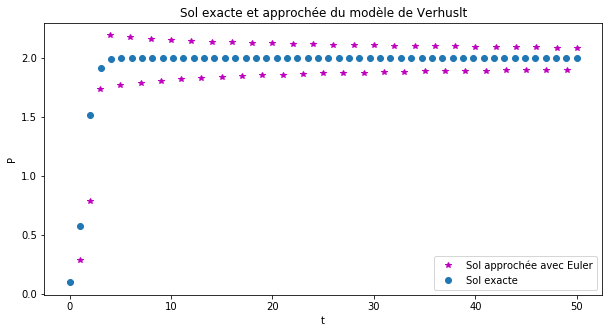

In [8]:
fig,ax = plt.subplots(1,1,figsize=(10,5))  
ax.plot(T,P,'m*',label ="Sol approchée avec Euler")
plt.plot(t,VerhulstSol(y0,t),'o', label = 'Sol exacte')
ax.legend()
ax.set_title("Sol exacte et approchée du modèle de Verhuslt") 
ax.set_xlabel("t")
ax.set_ylabel("P")

Text(0.5, 1.0, 'Sol exacte et approchée du modèle de Verhuslt avec un pas qui varie')

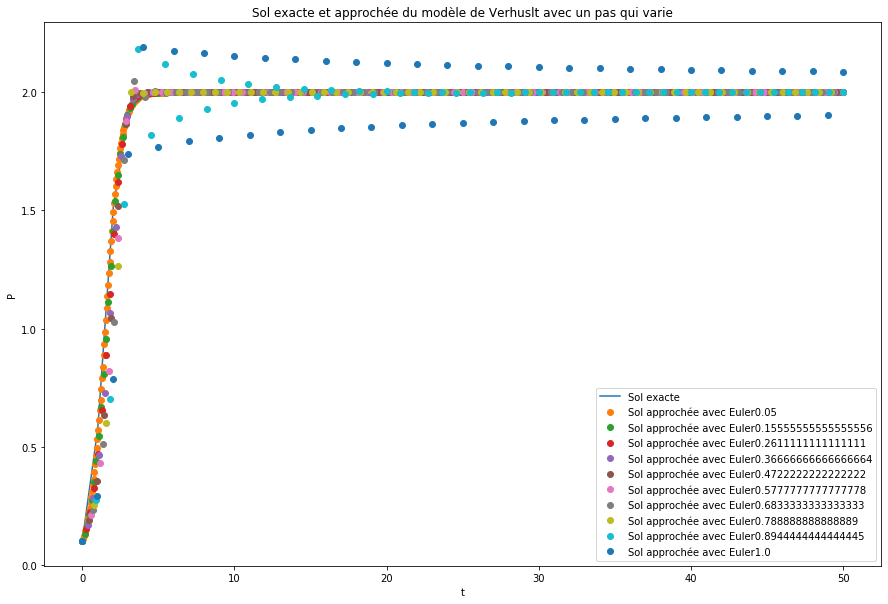

In [9]:
t = np.linspace(t0,tf,int(tf/dt))
fig,ax = plt.subplots(1,1,figsize=(15,10))  
plt.plot(t,VerhulstSol(y0,t),'-', label = 'Sol exacte')
TT = np.linspace(dt/20,dt,10)
for i in TT:
    n = int(tf/i)
    T,P = euler(VerhulstEDO,t0,tf,y0,n)
    ax.plot(T,P,'o',label ="Sol approchée avec Euler"+str(i))
    ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("P")
ax.set_title("Sol exacte et approchée du modèle de Verhuslt avec un pas qui varie") #ajout de titre
